In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import requests
import urllib.parse
import json
import csv
pd.set_option('display.max_rows', None) # I want to be able to see all rows
pd.set_option('mode.chained_assignment', None)
# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT CONSUMER CONFIDENCE INDEX DATA

In [3]:
# IMPORT CCI DATA - ARGENTINA 
# wrapper to API call

def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))
    
# convert the API call in CSV to a DataFrame using pandas
CCI_ARG = pd.read_csv(get_api_call(
    ["380.3_ICC_NACIONNAL_0_T_12"],
    format="csv", start_date=2015
))



#rename columns from spanish to English
CCI_ARG.rename(columns = {'indice_tiempo':'TIME','icc_nacional':'Value'}, inplace = True)


# Using DataFrame.insert() to add a column and populate with value = ARG
CCI_ARG.insert(0, "LOCATION",'ARG')

CCI_ARG.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  98 non-null     object 
 1   TIME      98 non-null     object 
 2   Value     98 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.4+ KB


In [4]:
# check for null values
CCI_ARG.isnull()

,LOCATION,TIME,Value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [5]:
# IMPORT CCI DATA - OECD;UK;USA 
# import CSV file into DataFrame

path= "/content/drive/MyDrive/Data Sets/CCI-OECD 2015-2023.csv"

CCI_OECD= pd.read_csv(path)

CCI_OECD.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    291 non-null    object 
 1   INDICATOR   291 non-null    object 
 2   SUBJECT     291 non-null    object 
 3   MEASURE     291 non-null    object 
 4   FREQUENCY   291 non-null    object 
 5   TIME        291 non-null    object 
 6   Value       291 non-null    float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 18.3+ KB


# PREPARING DATA

In [6]:
#CHECK FOR NULL VALUES
CCI_OECD.isnull()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,True


In [7]:
#FILL NaN with Unknown
CCI_OECD['Flag Codes'].fillna('Unknown', inplace=True)
CCI_OECD.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-01,100.4665,Unknown
1,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-02,100.6035,Unknown
2,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-03,100.6618,Unknown
3,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-04,100.6599,Unknown
4,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-05,100.5934,Unknown


In [8]:
# CONCATENATE VERTICALLY CCI_ARG DATAFRAME to the CCI_OECD DATAFRAME AND ONLY GET MATCHING COLUMNS
ALL_CCI= pd.concat([CCI_OECD, CCI_ARG], ignore_index = True, join='inner')

print (ALL_CCI)

    LOCATION        TIME       Value
0       OECD     2015-01  100.466500
1       OECD     2015-02  100.603500
2       OECD     2015-03  100.661800
3       OECD     2015-04  100.659900
4       OECD     2015-05  100.593400
5       OECD     2015-06  100.542700
6       OECD     2015-07  100.430500
7       OECD     2015-08  100.335700
8       OECD     2015-09  100.302600
9       OECD     2015-10  100.408800
10      OECD     2015-11  100.548000
11      OECD     2015-12  100.594400
12      OECD     2016-01  100.525400
13      OECD     2016-02  100.415400
14      OECD     2016-03  100.351800
15      OECD     2016-04  100.358900
16      OECD     2016-05  100.416100
17      OECD     2016-06  100.407000
18      OECD     2016-07  100.328700
19      OECD     2016-08  100.313200
20      OECD     2016-09  100.348600
21      OECD     2016-10  100.384700
22      OECD     2016-11  100.458600
23      OECD     2016-12  100.519400
24      OECD     2017-01  100.517900
25      OECD     2017-02  100.543100
2

In [9]:
# CHECK IF MISSING DATA
ALL_CCI.isnull().sum()

LOCATION    0
TIME        0
Value       0
dtype: int64

In [10]:
ALL_CCI.info

<bound method DataFrame.info of     LOCATION        TIME       Value
0       OECD     2015-01  100.466500
1       OECD     2015-02  100.603500
2       OECD     2015-03  100.661800
3       OECD     2015-04  100.659900
4       OECD     2015-05  100.593400
5       OECD     2015-06  100.542700
6       OECD     2015-07  100.430500
7       OECD     2015-08  100.335700
8       OECD     2015-09  100.302600
9       OECD     2015-10  100.408800
10      OECD     2015-11  100.548000
11      OECD     2015-12  100.594400
12      OECD     2016-01  100.525400
13      OECD     2016-02  100.415400
14      OECD     2016-03  100.351800
15      OECD     2016-04  100.358900
16      OECD     2016-05  100.416100
17      OECD     2016-06  100.407000
18      OECD     2016-07  100.328700
19      OECD     2016-08  100.313200
20      OECD     2016-09  100.348600
21      OECD     2016-10  100.384700
22      OECD     2016-11  100.458600
23      OECD     2016-12  100.519400
24      OECD     2017-01  100.517900
25    

In [11]:

# DUPLICATES
ALL_CCI=ALL_CCI.drop_duplicates()
ALL_CCI.shape

(389, 3)

In [12]:
# CHANGE "TIME" COLUMN FORMAT TO datetime64 format

ALL_CCI['TIME'] = pd.to_datetime(ALL_CCI['TIME'], format='%Y-%m-%d')

print(ALL_CCI)

    LOCATION       TIME       Value
0       OECD 2015-01-01  100.466500
1       OECD 2015-02-01  100.603500
2       OECD 2015-03-01  100.661800
3       OECD 2015-04-01  100.659900
4       OECD 2015-05-01  100.593400
5       OECD 2015-06-01  100.542700
6       OECD 2015-07-01  100.430500
7       OECD 2015-08-01  100.335700
8       OECD 2015-09-01  100.302600
9       OECD 2015-10-01  100.408800
10      OECD 2015-11-01  100.548000
11      OECD 2015-12-01  100.594400
12      OECD 2016-01-01  100.525400
13      OECD 2016-02-01  100.415400
14      OECD 2016-03-01  100.351800
15      OECD 2016-04-01  100.358900
16      OECD 2016-05-01  100.416100
17      OECD 2016-06-01  100.407000
18      OECD 2016-07-01  100.328700
19      OECD 2016-08-01  100.313200
20      OECD 2016-09-01  100.348600
21      OECD 2016-10-01  100.384700
22      OECD 2016-11-01  100.458600
23      OECD 2016-12-01  100.519400
24      OECD 2017-01-01  100.517900
25      OECD 2017-02-01  100.543100
26      OECD 2017-03-01  100

In [13]:
#Sorting CCI by Location (ascending ) and then Value in descending order
ALL_CCI_sorted= ALL_CCI.sort_values(["LOCATION", "Value"], ascending = [True, False])
print (ALL_CCI_sorted)

    LOCATION       TIME       Value
301      ARG 2015-11-01   60.350544
300      ARG 2015-10-01   56.962151
298      ARG 2015-08-01   56.781574
297      ARG 2015-07-01   56.090000
295      ARG 2015-05-01   54.994553
302      ARG 2015-12-01   54.894997
296      ARG 2015-06-01   54.881054
299      ARG 2015-09-01   54.618008
303      ARG 2016-01-01   54.007343
294      ARG 2015-04-01   52.850000
293      ARG 2015-03-01   52.600952
324      ARG 2017-10-01   51.107132
325      ARG 2017-11-01   51.101856
323      ARG 2017-09-01   51.039745
292      ARG 2015-02-01   50.473072
291      ARG 2015-01-01   49.948658
305      ARG 2016-03-01   48.157730
322      ARG 2017-08-01   47.609829
318      ARG 2017-04-01   46.190000
312      ARG 2016-10-01   46.040760
319      ARG 2017-05-01   45.760000
309      ARG 2016-07-01   45.605362
304      ARG 2016-02-01   45.594051
327      ARG 2018-01-01   45.188713
314      ARG 2016-12-01   44.480000
315      ARG 2017-01-01   44.466782
345      ARG 2019-07-01   44

In [14]:

#Form groups based o the 'TIME' variable
ALL_CCI_grouped = ALL_CCI.groupby(['TIME'])
ALL_CCI_grouped.first()
                        

,LOCATION,Value
TIME,,
2015-01-01,OECD,100.46650
2015-02-01,OECD,100.60350
2015-03-01,OECD,100.66180
2015-04-01,OECD,100.65990
2015-05-01,OECD,100.59340
2015-06-01,OECD,100.54270
2015-07-01,OECD,100.43050
2015-08-01,OECD,100.33570
2015-09-01,OECD,100.30260


In [15]:
#Find the entries for a specific date

ALL_CCI_grouped.get_group('2020-03-01')


,LOCATION,TIME,Value
62,OECD,2020-03-01,99.14299
159,GBR,2020-03-01,99.37786
256,USA,2020-03-01,100.16790
353,ARG,2020-03-01,41.23061


In [16]:
ALL_CCI_grouped.get_group('2020-04-01')

,LOCATION,TIME,Value
63,OECD,2020-04-01,98.004220
160,GBR,2020-04-01,97.819080
257,USA,2020-04-01,99.076770
354,ARG,2020-04-01,39.276279


In [17]:
ALL_CCI_grouped.get_group('2020-05-01')

,LOCATION,TIME,Value
64,OECD,2020-05-01,97.651480
161,GBR,2020-05-01,97.054730
258,USA,2020-05-01,98.574150
355,ARG,2020-05-01,38.416435


In [18]:
#Find the entries for a specific date
ALL_CCI_grouped.get_group('2018-11-01')

,LOCATION,TIME,Value
46,OECD,2018-11-01,100.828800
143,GBR,2018-11-01,100.389500
240,USA,2018-11-01,101.379200
337,ARG,2018-11-01,32.097534


# ANALYSIS

In [19]:
# Customised Function 

def information(df):
  minValue= df['Value'].min()
  maxValue = df['Value'].max()

  print("The minimum value in column 'Value':" , minValue)
  print ("The maximum value in column 'Value':" , maxValue)


 

In [20]:
#Split ALL_CCI by LOCATION  and setting a time range using query on multiple conditions. 
#Use information custom function


ARG_CCI = ALL_CCI.query('LOCATION=="ARG" and TIME <"2023-01-31"')

print(ARG_CCI)
information(ARG_CCI)

USA_CCI = ALL_CCI.query('LOCATION=="USA" and TIME < "2023-01-31"')

print(USA_CCI)

#Use customized funtion: "information"
information (USA_CCI)

    LOCATION       TIME      Value
291      ARG 2015-01-01  49.948658
292      ARG 2015-02-01  50.473072
293      ARG 2015-03-01  52.600952
294      ARG 2015-04-01  52.850000
295      ARG 2015-05-01  54.994553
296      ARG 2015-06-01  54.881054
297      ARG 2015-07-01  56.090000
298      ARG 2015-08-01  56.781574
299      ARG 2015-09-01  54.618008
300      ARG 2015-10-01  56.962151
301      ARG 2015-11-01  60.350544
302      ARG 2015-12-01  54.894997
303      ARG 2016-01-01  54.007343
304      ARG 2016-02-01  45.594051
305      ARG 2016-03-01  48.157730
306      ARG 2016-04-01  43.185665
307      ARG 2016-05-01  42.657166
308      ARG 2016-06-01  42.571453
309      ARG 2016-07-01  45.605362
310      ARG 2016-08-01  42.602177
311      ARG 2016-09-01  43.293732
312      ARG 2016-10-01  46.040760
313      ARG 2016-11-01  43.934200
314      ARG 2016-12-01  44.480000
315      ARG 2017-01-01  44.466782
316      ARG 2017-02-01  40.681772
317      ARG 2017-03-01  40.950099
318      ARG 2017-04

In [21]:
# For loop to get the Average CCI  value for ARGENTINA per year

mean_dict={}

for index, row in ARG_CCI.iterrows():
    year=row['TIME'].year
    if year in mean_dict:
      mean_dict[year].append(row["Value"])
    else:
      mean_dict[year] = [row['Value']]

result_ARG={}

for year, values in mean_dict.items():
  result_ARG[year]= sum(values)/len(values)

print("The Average CCI value for ARGENTINA per year is ':", result_ARG)

# For loop to get the Average CCI  value for USA per year

mean_dict1={}

for index, row in USA_CCI.iterrows():
    year=row['TIME'].year
    if year in mean_dict1:
      mean_dict1[year].append(row["Value"])
    else:
      mean_dict1[year] = [row['Value']]

result_USA={}

for year, values in mean_dict1.items():
  result_USA[year]= sum(values)/len(values)

print("The Average CCI value for USA per year is ':", result_USA)


The Average CCI value for ARGENTINA per year is ': {2015: 54.62046358333333, 2016: 45.17746991666666, 2017: 45.55053422222222, 2018: 37.65766675, 2019: 39.25011799999999, 2020: 40.2486445, 2021: 37.948486, 2022: 36.939911, 2023: 38.52}
The Average CCI value for USA per year is ': {2015: 100.81016666666666, 2016: 100.69175833333334, 2017: 101.28965, 2018: 101.45858333333332, 2019: 101.23385, 2020: 99.41663666666665, 2021: 98.97456416666665, 2022: 96.72737666666666, 2023: 97.29351}


In [22]:
# Numpy array -  Average CCI value for Argentina for period 2015-2023

Average_ARG = ARG_CCI["Value"] 
np_Average_ARG=np.array(Average_ARG)
Average_ARG_mean=np.mean(np_Average_ARG)
print ("The Average CCI value for Argentina FOR THE PERIOD JAN 2015-JAN 2023 is':" , Average_ARG_mean)


The Average CCI value for Argentina FOR THE PERIOD JAN 2015-JAN 2023 is': 42.13648997594501


In [23]:

# SET INDEX 
ARG_CCI.set_index('TIME', inplace=True)
USA_CCI.set_index('TIME', inplace=True)

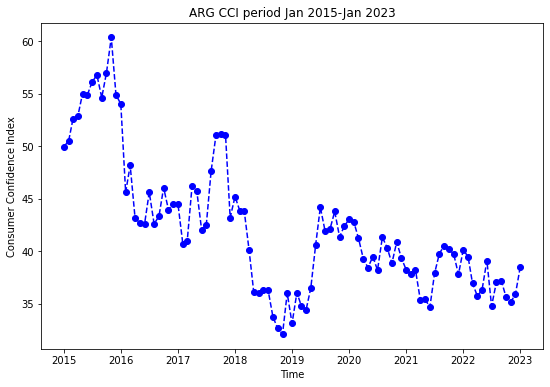

In [24]:
# Visualization #1  - ARGENTINA CCI FOR PERIOD JAN 2015-JAN 2023

plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()

ax.plot(ARG_CCI.index, ARG_CCI["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("ARG CCI period Jan 2015-Jan 2023")

plt.show()

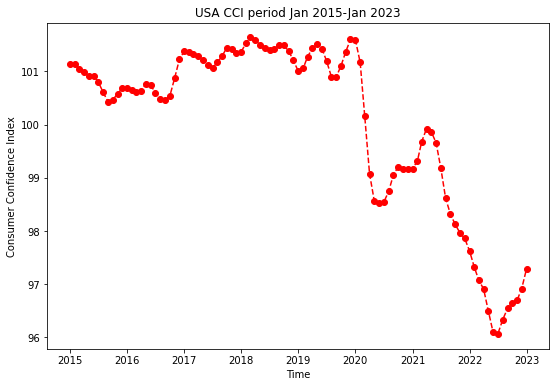

In [25]:
# Visualization #2 - USA CCI FOR PERIOD JAN 2015-JAN 2023

plt.rcParams['figure.figsize'] = (9, 6)
fig, ax=plt.subplots()

ax.plot(USA_CCI.index, USA_CCI["Value"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("USA CCI period Jan 2015-Jan 2023")

plt.show()

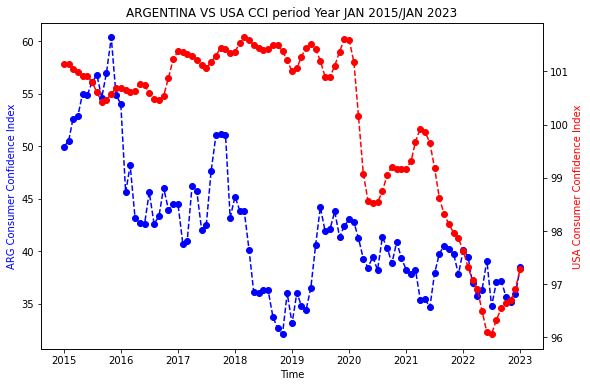

In [26]:
# Visualization #3  - Plotting time series with different variables
plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()
ax.plot(ARG_CCI.index, ARG_CCI["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("ARG Consumer Confidence Index", color='blue')
ax2 = ax.twinx()
ax2.plot(USA_CCI.index, USA_CCI["Value"], marker="o", linestyle="--", color="r")
ax2.set_ylabel("USA Consumer Confidence Index", color='red')

ax.set_title ("ARGENTINA VS USA CCI period Year JAN 2015/JAN 2023")
plt.show()

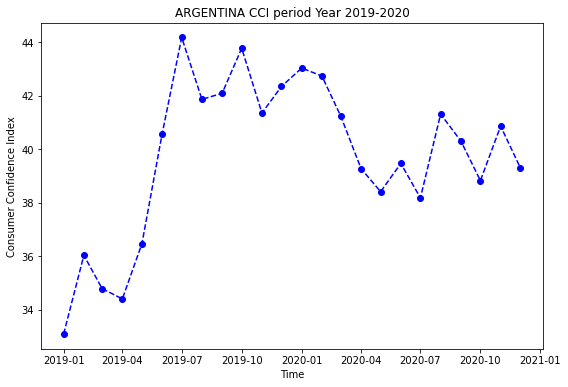

In [27]:
#Visualization #4
#zooming on ARG Period 2019-2020 BY SLICING INTO THE DATAFRAME
plt.rcParams['figure.figsize'] = (9, 6)
nineteen = ARG_CCI["2019-01-01":"2020-12-31"]
fig, ax=plt.subplots()
ax.plot(nineteen.index, nineteen["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("ARGENTINA CCI period Year 2019-2020")
plt.show()

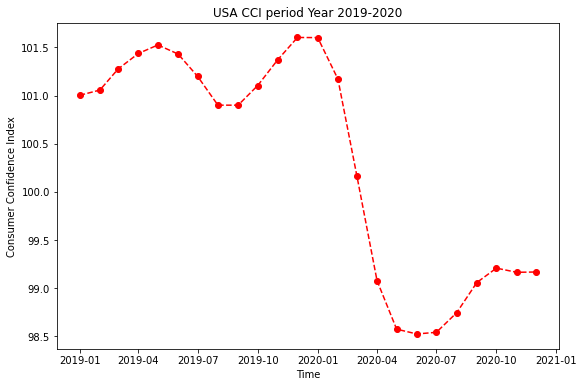

In [28]:
#Visualization #5
#zooming on USA Period 2019-2020 BY SLICING INTO THE DATAFRAME
plt.rcParams['figure.figsize'] = (9, 6)
nineteenusa = USA_CCI["2019-01-01":"2020-12-31"]
fig, ax=plt.subplots()
ax.plot(nineteenusa.index, nineteenusa["Value"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("USA CCI period Year 2019-2020")
plt.show()

In [29]:
#splitting the table by LOCATION and setting a time range using query on multiple conditions.
# Adding 2 columns ONE WITH ABSOLUTE VALUES
ARG_CCI1 = ALL_CCI.query('LOCATION=="ARG" and TIME <"2020-12-31" and TIME >= "2018-12-01"')
ARG_CCI1.set_index('TIME', inplace=True)
ARG_CCI1['CHANGE']=ARG_CCI1['Value'].diff()
ARG_CCI1['PCT_CHANGE']=ARG_CCI1['Value'].pct_change()
ARG_CCI1['PCT_CHANGE_ABS']=ARG_CCI1.PCT_CHANGE.abs()
print(ARG_CCI1)


USA_CCI1 = ALL_CCI.query('LOCATION=="USA" and TIME <"2020-12-31" and TIME >= "2018-12-01"')
USA_CCI1.set_index('TIME', inplace=True)
USA_CCI1['CHANGE']=USA_CCI1['Value'].diff()
USA_CCI1['PCT_CHANGE']=USA_CCI1['Value'].pct_change()
USA_CCI1['PCT_CHANGE_ABS']=USA_CCI1.PCT_CHANGE.abs()


print(USA_CCI1)

           LOCATION      Value    CHANGE  PCT_CHANGE  PCT_CHANGE_ABS
TIME                                                                
2018-12-01      ARG  35.989628       NaN         NaN             NaN
2019-01-01      ARG  33.101078 -2.888550   -0.080261        0.080261
2019-02-01      ARG  36.039967  2.938889    0.088785        0.088785
2019-03-01      ARG  34.794621 -1.245346   -0.034555        0.034555
2019-04-01      ARG  34.411144 -0.383477   -0.011021        0.011021
2019-05-01      ARG  36.472500  2.061356    0.059904        0.059904
2019-06-01      ARG  40.574234  4.101734    0.112461        0.112461
2019-07-01      ARG  44.176544  3.602310    0.088783        0.088783
2019-08-01      ARG  41.862835 -2.313709   -0.052374        0.052374
2019-09-01      ARG  42.093285  0.230450    0.005505        0.005505
2019-10-01      ARG  43.772411  1.679126    0.039891        0.039891
2019-11-01      ARG  41.354538 -2.417873   -0.055237        0.055237
2019-12-01      ARG  42.348259  0.

In [30]:
# MERGE USA AND ARG , ADD SUFFIXES AND REMOVE UNWANTED COLUMNS AND THE FIRST ROW WITH NAN VALUES
USA_ARG=pd.merge_ordered(ARG_CCI1, USA_CCI1, on='TIME', suffixes =('_ARG', '_USA'))
USA_ARG=USA_ARG.loc[1:,("TIME", "CHANGE_ARG","CHANGE_USA", "PCT_CHANGE_ARG", "PCT_CHANGE_USA")]
USA_ARG.set_index('TIME', inplace=True)
print(USA_ARG)

            CHANGE_ARG  CHANGE_USA  PCT_CHANGE_ARG  PCT_CHANGE_USA
TIME                                                              
2019-01-01   -2.888550    -0.20530       -0.080261   -2.028504e-03
2019-02-01    2.938889     0.05450        0.088785    5.395917e-04
2019-03-01   -1.245346     0.21920       -0.034555    2.169077e-03
2019-04-01   -0.383477     0.16070       -0.011021    1.586753e-03
2019-05-01    2.061356     0.08840        0.059904    8.714795e-04
2019-06-01    4.101734    -0.09430        0.112461   -9.288343e-04
2019-07-01    3.602310    -0.23310        0.088783   -2.298119e-03
2019-08-01   -2.313709    -0.29770       -0.052374   -2.941766e-03
2019-09-01    0.230450    -0.00010        0.005505   -9.910803e-07
2019-10-01    1.679126     0.20400        0.039891    2.021806e-03
2019-11-01   -2.417873     0.27010       -0.055237    2.671509e-03
2019-12-01    0.993721     0.22900        0.024029    2.258962e-03
2020-01-01    0.686241    -0.00160        0.016205   -1.574757

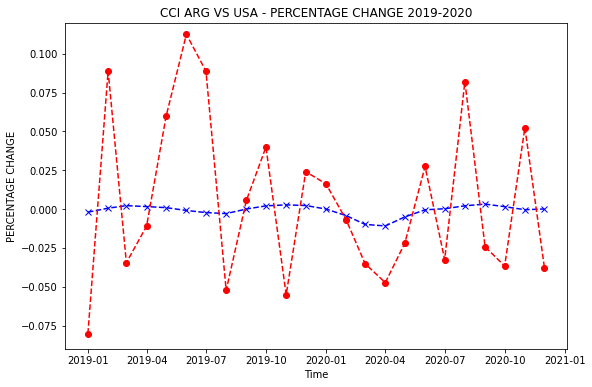

In [31]:
#Visualization #6 -Compare CCI PERCENTAGE CHANGE BETWEEN ARG AND US FOR PERIOD 2019-2020. 
#Change y axis scale to make graph more meaningful
plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()

ax.plot(USA_ARG.index, USA_ARG["PCT_CHANGE_USA"], marker="x", linestyle="--", color="b")
ax.plot(USA_ARG.index, USA_ARG["PCT_CHANGE_ARG"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("PERCENTAGE CHANGE")
ax.set_title ("CCI ARG VS USA - PERCENTAGE CHANGE 2019-2020")
plt.ylim(bottom=-0.09, top=0.12)
plt.show()

In [32]:
# MERGE USA AND ARG ABSOLUTE VALUES

USA_ARG_ABS=pd.merge_ordered(ARG_CCI1, USA_CCI1, on='TIME', suffixes =('_ARG', '_USA'))
USA_ARG_ABS=USA_ARG_ABS.loc[1:,("TIME", "CHANGE_ARG","CHANGE_USA", "PCT_CHANGE_ABS_ARG", "PCT_CHANGE_ABS_USA")]
USA_ARG_ABS.set_index('TIME', inplace=True)

USA_ARG_ABS.head()

,CHANGE_ARG,CHANGE_USA,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_USA
TIME,,,,
2019-01-01,-2.888550,-0.2053,0.080261,0.002029
2019-02-01,2.938889,0.0545,0.088785,0.000540
2019-03-01,-1.245346,0.2192,0.034555,0.002169
2019-04-01,-0.383477,0.1607,0.011021,0.001587
2019-05-01,2.061356,0.0884,0.059904,0.000871


In [33]:
#CHECK IF ARGENTINA EVER HAD A LOWER PERCENTAGE CHANGE THAN THE USA DURING THE PERIOD 2019-2020.
#USE OF BOOLEAN
USA_ARG_ABS['ARG LOWER ABS PCT CHANGE']=np.where(USA_ARG_ABS['PCT_CHANGE_ABS_USA'] > USA_ARG_ABS['PCT_CHANGE_ABS_ARG'], True, False)

USA_ARG_ABS.head(100)

,CHANGE_ARG,CHANGE_USA,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_USA,ARG LOWER ABS PCT CHANGE
TIME,,,,,
2019-01-01,-2.888550,-0.20530,0.080261,2.028504e-03,False
2019-02-01,2.938889,0.05450,0.088785,5.395917e-04,False
2019-03-01,-1.245346,0.21920,0.034555,2.169077e-03,False
2019-04-01,-0.383477,0.16070,0.011021,1.586753e-03,False
2019-05-01,2.061356,0.08840,0.059904,8.714795e-04,False
2019-06-01,4.101734,-0.09430,0.112461,9.288343e-04,False
2019-07-01,3.602310,-0.23310,0.088783,2.298119e-03,False
2019-08-01,-2.313709,-0.29770,0.052374,2.941766e-03,False
2019-09-01,0.230450,-0.00010,0.005505,9.910803e-07,False


In [34]:
#splitting the table by LOCATION WITH NO TIME RANGE. Adding 3 columns ONE WITH ABSOLUTE VALUES
ARG_CCI2 = ALL_CCI.query('LOCATION=="ARG"')
ARG_CCI2.set_index('TIME', inplace=True)
ARG_CCI2['CHANGE']=ARG_CCI2['Value'].diff()
ARG_CCI2['PCT_CHANGE']=ARG_CCI2['Value'].pct_change()
ARG_CCI2['PCT_CHANGE_ABS']=ARG_CCI2.PCT_CHANGE.abs()



OECD_CCI = ALL_CCI.query('LOCATION=="OECD"')
OECD_CCI.set_index('TIME', inplace=True)
OECD_CCI['CHANGE']=OECD_CCI['Value'].diff()
OECD_CCI['PCT_CHANGE']=OECD_CCI['Value'].pct_change()
OECD_CCI['PCT_CHANGE_ABS']=OECD_CCI.PCT_CHANGE.abs()

USA_CCI2 = ALL_CCI.query('LOCATION=="USA"')
USA_CCI2.set_index('TIME', inplace=True)
USA_CCI2['CHANGE']=USA_CCI2['Value'].diff()
USA_CCI2['PCT_CHANGE']=USA_CCI2['Value'].pct_change()
USA_CCI2['PCT_CHANGE_ABS']=USA_CCI2.PCT_CHANGE.abs()



In [35]:


# MERGE OECD AND ARG ABSOLUTE VALUES

OECD_ARG_ABS=pd.merge_ordered(ARG_CCI2, OECD_CCI, on='TIME', suffixes =('_ARG', '_OECD'))
OECD_ARG_ABS=OECD_ARG_ABS.loc[0:,("TIME", "CHANGE_ARG","CHANGE_OECD", "PCT_CHANGE_ABS_ARG", "PCT_CHANGE_ABS_OECD")]

OECD_ARG_ABS.set_index('TIME', inplace=True)

OECD_ARG_ABS.head(200)

,CHANGE_ARG,CHANGE_OECD,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_OECD
TIME,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-02-01,0.524414,0.13700,0.010499,0.001364
2015-03-01,2.127880,0.05830,0.042159,0.000580
2015-04-01,0.249048,-0.00190,0.004735,0.000019
2015-05-01,2.144553,-0.06650,0.040578,0.000661
2015-06-01,-0.113499,-0.05070,0.002064,0.000504
2015-07-01,1.208946,-0.11220,0.022028,0.001116
2015-08-01,0.691574,-0.09480,0.012330,0.000944
2015-09-01,-2.163566,-0.03310,0.038103,0.000330


In [36]:
#DROP NaN
OECD_ARG_ABS2=OECD_ARG_ABS.dropna(axis=0)

OECD_ARG_ABS2.head()


,CHANGE_ARG,CHANGE_OECD,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_OECD
TIME,,,,
2015-02-01,0.524414,0.1370,0.010499,0.001364
2015-03-01,2.127880,0.0583,0.042159,0.000580
2015-04-01,0.249048,-0.0019,0.004735,0.000019
2015-05-01,2.144553,-0.0665,0.040578,0.000661
2015-06-01,-0.113499,-0.0507,0.002064,0.000504


In [37]:
#CHECK IF ARGENTINA EVER HAD A LOWER ABSOLUTE PERCENTAGE CHANGE THAN THE OECD . USE OF BOOLEAN
OECD_ARG_ABS2['ARG LOWER ABS PCT CHANGE']=np.where(OECD_ARG_ABS2['PCT_CHANGE_ABS_OECD'] > OECD_ARG_ABS2['PCT_CHANGE_ABS_ARG'], True, False)

result=OECD_ARG_ABS2[OECD_ARG_ABS2['ARG LOWER ABS PCT CHANGE']== True]
result.head()

,CHANGE_ARG,CHANGE_OECD,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_OECD,ARG LOWER ABS PCT CHANGE
TIME,,,,,
2017-11-01,-0.005276,0.0245,0.000103,0.000242,True
2018-08-01,-0.004959,-0.0558,0.000137,0.000551,True


In [38]:
# CREATING A FUNCTION THAT PLOTS TIME SERIES

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

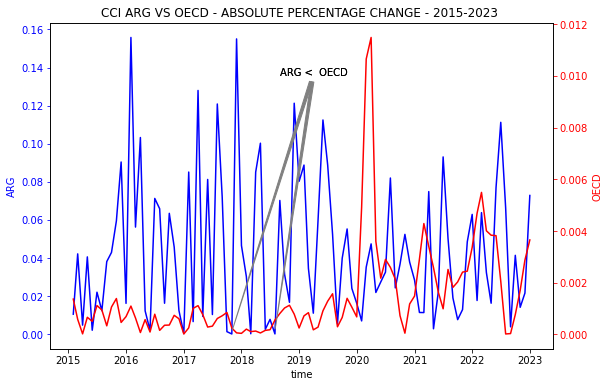

In [39]:
# VISUALIZATION #7 WITH ANNOTATIONS, TEXT POSITIONING AND ARROWS
fig, ax=plt.subplots()
ax.set_title ("CCI ARG VS OECD - ABSOLUTE PERCENTAGE CHANGE - 2015-2023 ")
plot_timeseries(ax, OECD_ARG_ABS2.index, OECD_ARG_ABS2['PCT_CHANGE_ABS_ARG'], 'blue', 'time', 'ARG')
ax2=ax.twinx()
plot_timeseries(ax2,OECD_ARG_ABS2.index, OECD_ARG_ABS2['PCT_CHANGE_ABS_OECD'], 'red', 'time', 'OECD') 
ax2.annotate("ARG <  OECD", 
             xy=(pd.Timestamp("2017-11-01"), 0.000103),
             xytext=(pd.Timestamp("2018-09-01"), 0.01),
             arrowprops={"arrowstyle":"wedge", "color":"gray"})
ax2.annotate("ARG <  OECD", 
             xy=(pd.Timestamp("2018-08-01"), 0.000137),
             xytext=(pd.Timestamp("2018-09-01"), 0.01),
             arrowprops={"arrowstyle":"wedge", "color":"gray"})

plt.show()

In [41]:
# MERGE OECD AND USA ABSOLUTE VALUES

OECD_USA_ABS=pd.merge_ordered(USA_CCI2, OECD_CCI, on='TIME', suffixes =('_USA', '_OECD'))
OECD_USA_ABS=OECD_USA_ABS.loc[0:,("TIME", "CHANGE_USA","CHANGE_OECD", "PCT_CHANGE_ABS_USA", "PCT_CHANGE_ABS_OECD")]

OECD_USA_ABS.set_index('TIME', inplace=True)

OECD_USA_ABS.head()

,CHANGE_USA,CHANGE_OECD,PCT_CHANGE_ABS_USA,PCT_CHANGE_ABS_OECD
TIME,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-02-01,0.0023,0.1370,0.000023,0.001364
2015-03-01,-0.0994,0.0583,0.000983,0.000580
2015-04-01,-0.0564,-0.0019,0.000558,0.000019
2015-05-01,-0.0828,-0.0665,0.000820,0.000661


In [42]:
#DROP NaN
OECD_USA_ABS2=OECD_USA_ABS.dropna(axis=0)

OECD_USA_ABS2.head()

,CHANGE_USA,CHANGE_OECD,PCT_CHANGE_ABS_USA,PCT_CHANGE_ABS_OECD
TIME,,,,
2015-02-01,0.0023,0.1370,0.000023,0.001364
2015-03-01,-0.0994,0.0583,0.000983,0.000580
2015-04-01,-0.0564,-0.0019,0.000558,0.000019
2015-05-01,-0.0828,-0.0665,0.000820,0.000661
2015-06-01,0.0145,-0.0507,0.000144,0.000504


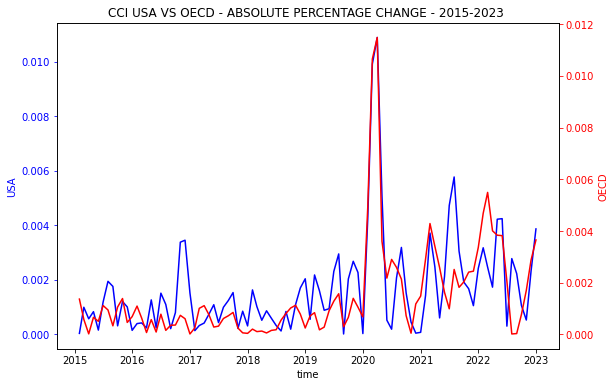

In [43]:
# VISUALIZATION #8 
fig, ax=plt.subplots()
ax.set_title ("CCI USA VS OECD - ABSOLUTE PERCENTAGE CHANGE - 2015-2023 ")
plot_timeseries(ax, OECD_USA_ABS2.index, OECD_USA_ABS2['PCT_CHANGE_ABS_USA'], 'blue', 'time', 'USA')
ax2=ax.twinx()
plot_timeseries(ax2,OECD_USA_ABS2.index, OECD_USA_ABS2['PCT_CHANGE_ABS_OECD'], 'red', 'time', 'OECD') 


plt.show()